# Capstone Project

## US Car Accidents: What influences the severity of Car Accidents?



### Data
https://www.kaggle.com/sobhanmoosavi/us-accidents

### Description

This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is collected from February 2016 to December 2019, using several data providers, including two APIs that provide streaming traffic incident data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 3.0 million accident records in this dataset. Check here to learn more about this dataset.

### Acknowledgements

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.


In [31]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('US_Accidents_May19.csv')

In [4]:
df.shape

(2243939, 49)

In [5]:
df.head().T

,0,1,2,3,4
ID,A-1,A-2,A-3,A-4,A-5
Source,MapQuest,MapQuest,MapQuest,MapQuest,MapQuest
TMC,201,201,201,201,201
Severity,3,2,2,3,2
Start_Time,2016-02-08 05:46:00,2016-02-08 06:07:59,2016-02-08 06:49:27,2016-02-08 07:23:34,2016-02-08 07:39:07
End_Time,2016-02-08 11:00:00,2016-02-08 06:37:59,2016-02-08 07:19:27,2016-02-08 07:53:34,2016-02-08 08:09:07
Start_Lat,39.8651,39.9281,39.0631,39.7478,39.6278
Start_Lng,-84.0587,-82.8312,-84.0326,-84.2056,-84.1884
End_Lat,NaN,NaN,NaN,NaN,NaN
End_Lng,NaN,NaN,NaN,NaN,NaN


### Select variables (columns)
There are 48 variables and here I use only 16 variables for prediction. 

In [55]:
select_lst = ['Source','TMC','Severity','Start_Lng','Start_Lat',
    'Distance(mi)','Side','City','County','State','Timezone',
    'Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)',
    'Weather_Condition']

In [56]:
# Take only selected variables(columns)
df1 = df[select_lst]
df1.shape

(2243939, 16)

In [57]:
# remove NA values
df2 = df1.dropna()
df2.shape

(1663667, 16)

## Which State has the most car accidents?

Text(0.5, 1.0, 'Number of Accidents by State')

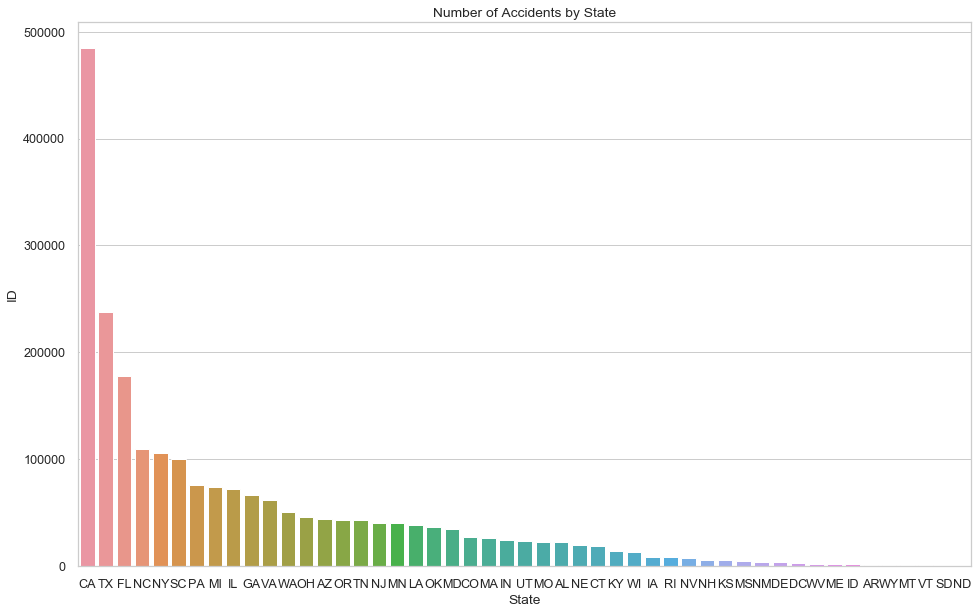

In [126]:
bystates = df.groupby('State')['ID'].count().reset_index()
bystates = bystates.sort_values(by = "ID",ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(16,10))
sns.set_context("notebook", font_scale=1.15)
sns.barplot(x='State',y='ID',data=bystates)
plt.title('Number of Accidents by State')

## Let's predict the severity of San Francisco, CA

In [127]:
# select State & County
state = 'CA'
county = 'San Francisco'

In [62]:
# select State
df_state=df2[df2.State==state]
df_state.head().T

,728,729,730,731,732
Source,MapQuest,MapQuest,MapQuest,MapQuest,MapQuest
TMC,201,201,201,201,201
Severity,3,3,2,3,2
Start_Lng,-122.233,-122.084,-122.071,-122.032,-121.911
Start_Lat,38.0853,37.6318,37.8966,37.3343,37.2507
Distance(mi),0,0,0,0,0
Side,R,R,R,R,R
City,Vallejo,Hayward,Walnut Creek,Cupertino,San Jose
County,Solano,Alameda,Contra Costa,Santa Clara,Santa Clara
State,CA,CA,CA,CA,CA


In [63]:
# select county
df_county=df_state[df_state.County==county]
df_county.head().T

,735,765,766,788,808
Source,MapQuest,MapQuest,MapQuest,MapQuest,MapQuest
TMC,201,201,201,201,201
Severity,3,3,2,3,2
Start_Lng,-122.448,-122.405,-122.403,-122.415,-122.476
Start_Lat,37.7192,37.7327,37.7495,37.732,37.8071
Distance(mi),0,0,0,0,0
Side,R,R,R,R,R
City,San Francisco,San Francisco,San Francisco,San Francisco,San Francisco
County,San Francisco,San Francisco,San Francisco,San Francisco,San Francisco
State,CA,CA,CA,CA,CA


In [64]:
# Generate dummies for categorical data
df_dummy = pd.get_dummies(df_county,drop_first=True)
df_dummy.shape

(4487, 25)

In [68]:
# set X and y for prediction model
# y: severity to be predicted
# X: dependent variables to predict y
target = 'Severity'
X = df_dummy.drop(target,axis=1)
y = df_dummy[target]

In [69]:
# Split dataset into test and training sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier

# Fitting Decision Tree Classification to the training set
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
y_pred = clf.predict(X_test)

In [73]:
# measure accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)

### Visualize important features for Prediction Model

In [75]:
plt.style.use('ggplot')
feature_important = pd.Series(clf.feature_importances_,
                    index=X.columns).sort_values(ascending=False)

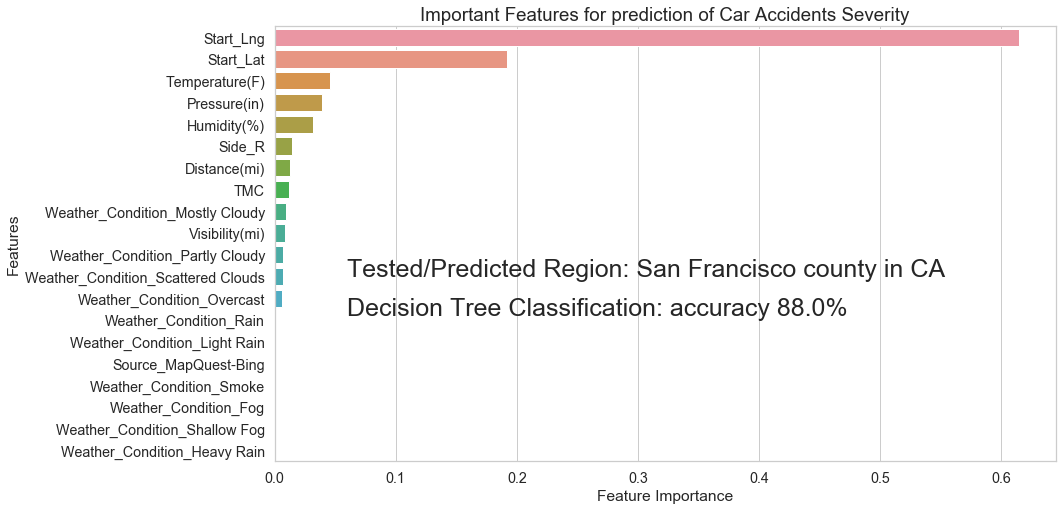

In [107]:
plt.figure(figsize=(14,8))
k = 20
sns.barplot(x=feature_important[:k],y=feature_important.index[:k])
sns.set_context("notebook", font_scale=1.3)

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Important Features for prediction of Car Accidents Severity'
          ,fontsize='large')

acc1 = round(acc,2)*100
plt.text(0.06,12.8,'Decision Tree Classification: accuracy {}%'.format(acc1),fontsize=25)
plt.text(0.06,11.0,'Tested/Predicted Region: {} county in {}'.format(county,state),fontsize=25)
plt.show()

## Word Cloud
: to have an idea about what kind of weather status are dominant for car accidents

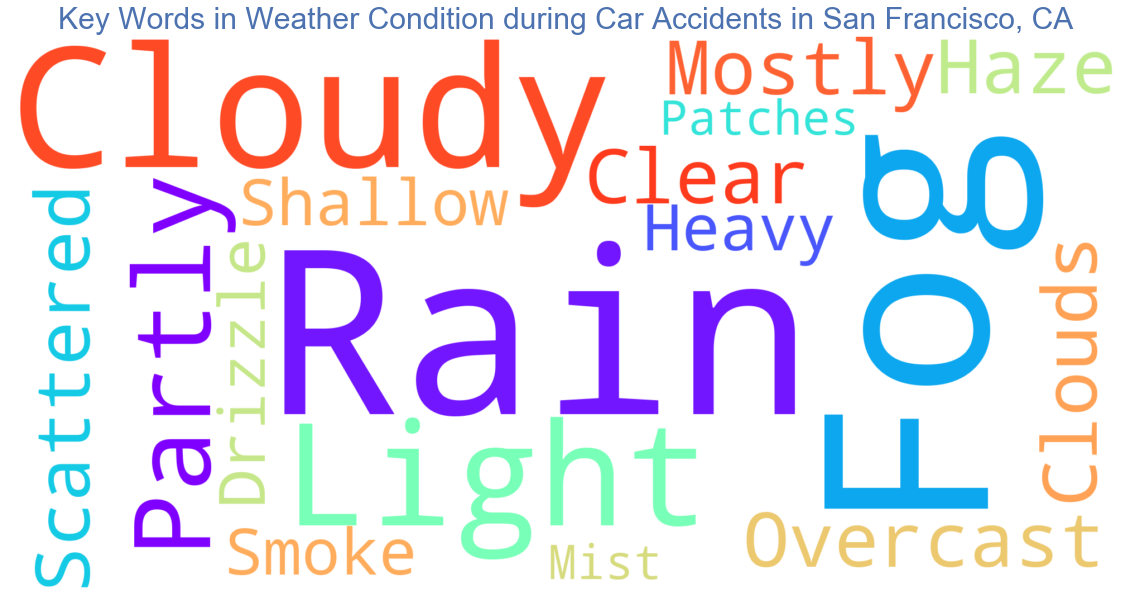

In [112]:
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = df_county["Weather_Condition"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(wrds1))
plt.figure(figsize=(20,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Weather Condition during Car Accidents in {}, {}".format(county,state),fontsize = 30,color='b')
plt.show()

## Let's predict car accidents in MD

In [114]:

# select State & County
state = 'MD'
county = 'Montgomery'

In [115]:
# select state
df_state = df2.loc[df2.State==state].copy()
df_state.drop('State',axis=1,inplace = True)
df_state.info()
df_state.County.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17200 entries, 228552 to 1725077
Data columns (total 15 columns):
Source               17200 non-null object
TMC                  17200 non-null float64
Severity             17200 non-null int64
Start_Lng            17200 non-null float64
Start_Lat            17200 non-null float64
Distance(mi)         17200 non-null float64
Side                 17200 non-null object
City                 17200 non-null object
County               17200 non-null object
Timezone             17200 non-null object
Temperature(F)       17200 non-null float64
Humidity(%)          17200 non-null float64
Pressure(in)         17200 non-null float64
Visibility(mi)       17200 non-null float64
Weather_Condition    17200 non-null object
dtypes: float64(8), int64(1), object(6)
memory usage: 2.1+ MB


array(['Anne Arundel', 'Harford', 'Washington', 'Montgomery',
       "Prince George's", 'Frederick', 'Howard', 'Baltimore County',
       'Prince Georges', 'Carroll', 'Baltimore City', 'Cecil',
       'Baltimore', 'Talbot', "Queen Anne's", 'Allegany', 'Queen Annes',
       'Charles', 'Caroline', 'Garrett', 'Calvert', 'Kent', 'Dorchester',
       'Somerset', 'Worcester', "St. Mary's", 'Wicomico'], dtype=object)

In [116]:
# select county
df_county = df_state.loc[df_state.County == county].copy()
df_county.drop('County',axis=1,inplace=True)
df_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650 entries, 228629 to 1725051
Data columns (total 14 columns):
Source               3650 non-null object
TMC                  3650 non-null float64
Severity             3650 non-null int64
Start_Lng            3650 non-null float64
Start_Lat            3650 non-null float64
Distance(mi)         3650 non-null float64
Side                 3650 non-null object
City                 3650 non-null object
Timezone             3650 non-null object
Temperature(F)       3650 non-null float64
Humidity(%)          3650 non-null float64
Pressure(in)         3650 non-null float64
Visibility(mi)       3650 non-null float64
Weather_Condition    3650 non-null object
dtypes: float64(8), int64(1), object(5)
memory usage: 427.7+ KB


In [117]:
# Generate dummies for categorical data
df_county_dummy = pd.get_dummies(df_county,drop_first=True)
df_county_dummy.shape

(3650, 53)

In [118]:
# set X and y for model
# y = seveirity to be predicted
# x : dependent variables to predict y

target = 'Severity'
X = df_county_dummy.drop(target,axis=1)
y = df_county_dummy[target]

# Split dataset into test and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                test_size = 0.3, random_state=0)

In [119]:
# use Decision Tree Clasifier
from sklearn.tree import DecisionTreeClassifier
X_train.shape
X_test.shape

(1095, 52)

In [120]:
# Fitting Decision Tree Classification to the training Set
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [121]:
# Predicting the test set results
y_pred = clf.predict(X_test)

In [122]:
# measure accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
acc

0.8401826484018264

### Visualize important features for Prediction Model

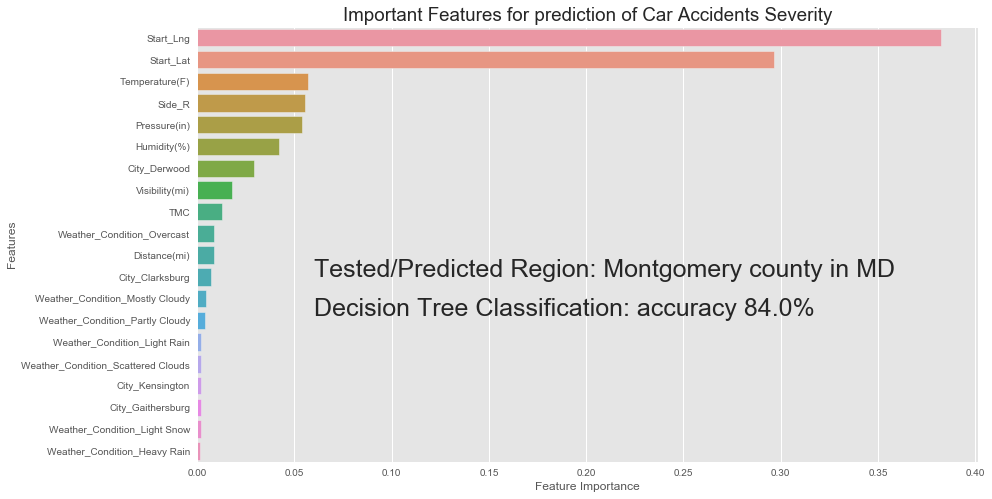

In [124]:
plt.style.use('ggplot')
feature_important = pd.Series(clf.feature_importances_,
                    index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(14,8))
k = 20
sns.barplot(x=feature_important[:k],y=feature_important.index[:k])
sns.set_context("notebook", font_scale=1.3)

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Important Features for prediction of Car Accidents Severity'
          ,fontsize='large')

acc1 = round(acc,2)*100
plt.text(0.06,12.8,'Decision Tree Classification: accuracy {}%'.format(acc1),fontsize=25)
plt.text(0.06,11.0,'Tested/Predicted Region: {} county in {}'.format(county,state),fontsize=25)
plt.show()

## Word Cloud
: to have an idea about what kind of weather status are dominant for car accidents

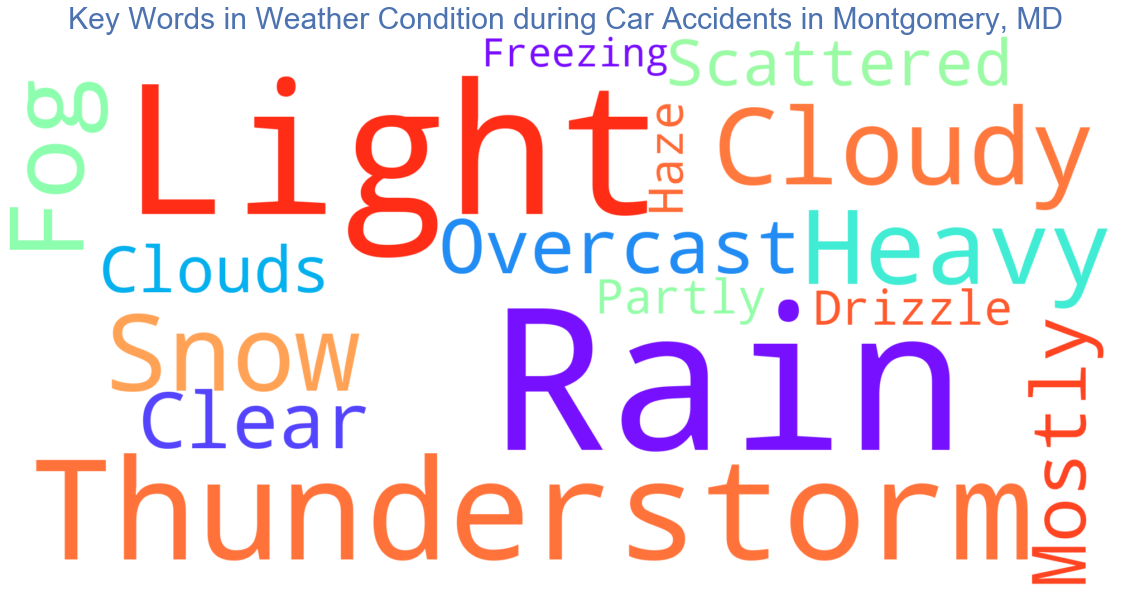

In [125]:
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = df_county["Weather_Condition"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(wrds1))
plt.figure(figsize=(20,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Weather Condition during Car Accidents in {}, {}".format(county,state),fontsize = 30,color='b')
plt.show()